In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [82]:
data = pd.read_excel("Sleep_health_and_lifestyle_dataset.xlsx")
data = data.drop(["Occupation","Gender","Sleep Disorder","Person ID"],axis=1)

In [83]:
data['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [84]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
data['BMI Category']= label_encoder.fit_transform(data['BMI Category'])
  
data['BMI Category'].unique()
y= data[['BMI Category']]

In [85]:
data[['systolic_bp', 'diastolic_bp']] = data['Blood Pressure'].str.split('/', expand=True)
data.drop('Blood Pressure', axis=1, inplace=True)

In [86]:
data.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,systolic_bp,diastolic_bp
0,27,6.1,6,42,6,3,77,4200,126,83
1,28,6.2,6,60,8,0,75,10000,125,80
2,28,6.2,6,60,8,0,75,10000,125,80
3,28,5.9,4,30,8,2,85,3000,140,90
4,28,5.9,4,30,8,2,85,3000,140,90


In [87]:
y.head()

,BMI Category
0,3
1,0
2,0
3,2
4,2


In [88]:
X= data
X = X.fillna(0)
X.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,systolic_bp,diastolic_bp
0,27,6.1,6,42,6,3,77,4200,126,83
1,28,6.2,6,60,8,0,75,10000,125,80
2,28,6.2,6,60,8,0,75,10000,125,80
3,28,5.9,4,30,8,2,85,3000,140,90
4,28,5.9,4,30,8,2,85,3000,140,90


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy')   
rf_clf.fit(X_train,y_train)

C:\Users\samar\AppData\Local\Temp\ipykernel_21808\2979736318.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy')

In [91]:
y_predict = rf_clf.predict(X_test)
print(y_predict)

[1 0 3 0 0 0 0 0 3 1 0 0 0 0 0 3 3 0 3 0 3 0 3 0 3 3 0 0 3 0 3 1 0 3 2 0 3
 3 0 3 3 0 3 0 0 0 0 3 3 3 0 0 0 3 0 0 1 1 3 0 0 1 0 2 3 3 0 0 3 0 2 0 0 1
 0]


In [92]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.9866666666666667

<AxesSubplot:>

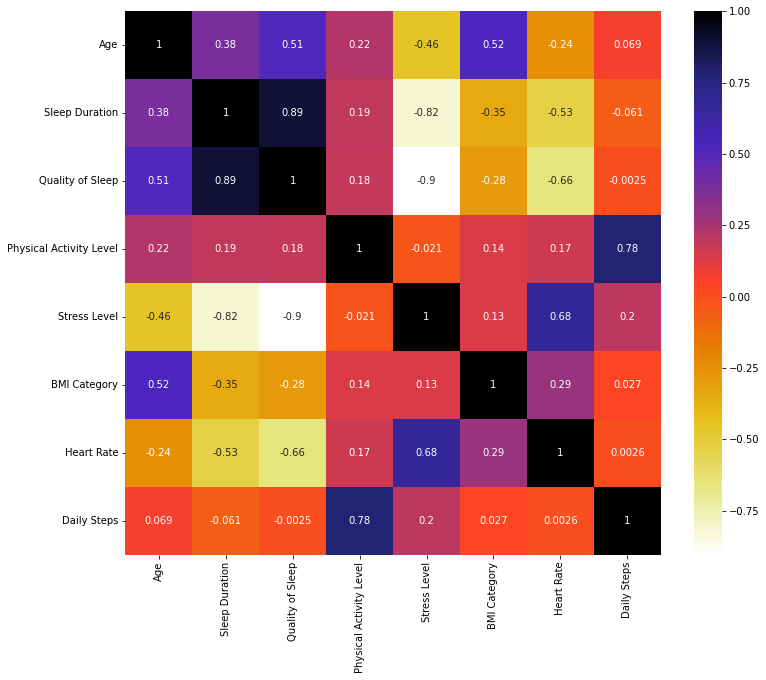

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor= X_train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)